In [1]:
import keras
import random
import cv2
import os
import numpy as np
from scipy import ndimage
from sklearn.model_selection import train_test_split as split
import tensorflow as tf
import tensorflow
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.optimizers import schedules, Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy



C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def label_encoder(img):
    print (img.shape)
    label=np.zeros(list(img.shape[:-1])+[1])
    classes=([0,0,0],[0,0,255],
             [0,255,0],
             [0,255,255],
             [255,0,0],
             [255,0,255],
             [255,255,0],
             [255,255,255],
    )
    
    for j in range(8):
        temp=np.zeros(8)
        temp[j]=1
        label[np.all(img == classes[j], axis=-1)]=j
    return label
def data_augmentation(inputs, labels):
	# Use the same seed for deterministic randomness over both inputs and labels.
	seed = 36

	# Feed data through layers
	inputs = tf.image.random_flip_left_right(inputs, seed=seed)
	inputs = tf.image.random_flip_up_down(inputs, seed=seed)
	labels = tf.image.random_flip_left_right(labels, seed=seed)
	labels = tf.image.random_flip_up_down(labels, seed=seed)

	return inputs, labels
def data_augmentation2(inputs, labels):
	# Use the same seed for deterministic randomness over both inputs and labels.
	seed = 86

	# Feed data through layers
	inputs = tf.image.random_flip_left_right(inputs, seed=seed)
	labels = tf.image.random_flip_left_right(labels, seed=seed)

	return inputs, labels
def data_augmentation3(inputs, labels):
	# Use the same seed for deterministic randomness over both inputs and labels.
	seed = 45

	# Feed data through layers
	inputs = tf.image.random_flip_up_down(inputs, seed=seed)
	labels = tf.image.random_flip_up_down(labels, seed=seed)

	return inputs, labels
def jitter(x):
    a=0.2
    b=0.2
    img=cv2.convertScaleAbs(x,alpha=a,beta=b)
    value = np.random.choice(np.array([-20,20]))
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    if value >= 0:
        lim = 255 - value
        s[s > lim] = 255
        s[s <= lim] += value
    else:
        lim = np.absolute(value)
        s[s < lim] = 0
        s[s >= lim] -= np.absolute(value)

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img
x_test,y_test=[],[]
x_train,y_train=[],[]
test_path="C:/Amir_Bakhtiary/dl/CA3/B/dataset/"

for j in os.listdir(test_path+"train_val/images"):
    x_train.append(cv2.resize(cv2.imread(test_path+"train_val/images/"+j,cv2.COLOR_BGR2RGB),(160,160)))
for j in os.listdir(test_path+"train_val/masks"):
    
    x=cv2.resize(cv2.imread(test_path+"train_val/masks/"+j,cv2.COLOR_BGR2RGB),(160,160))
    y_train.append(x)
x_val=np.array(x_train[-150:]).astype("float32")/255
y_val=np.array(y_train[-150:])
x_train.pop(150)
y_train.pop(150)
for j in range(1,len(x_train),2):
    i,l=data_augmentation(x_train[j],y_train[j])
    x_train.append(i)
    y_train.append(l)
    i,l=data_augmentation2(x_train[j-1],y_train[j-1])
    x_train.append(i)
    y_train.append(l)
    i,l=data_augmentation3(x_train[j],y_train[j])
    x_train.append(i)
    y_train.append(l)
    i=jitter(x_train[j])
    x_train.append(i)
    y_train.append(y_train[j])
y_train_coded=[]
y_val_coded=[]
for j in y_train:
    y_train_coded.append(label_encoder(j))
for j in y_val:
    y_val_coded.append(label_encoder(j))
x_train=np.array(x_train).astype("float32")/255

y_train=np.array(y_train_coded)#.astype("float32")/255
y_val=np.array(y_val_coded)#.astype("float32")/255
y_val=keras.utils.to_categorical(y_val)
y_train=keras.utils.to_categorical(y_train)

(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 

In [3]:
y_train.shape

(4572, 160, 160, 8)

In [4]:
from keras.optimizers import Adam
from keras.models import  Model
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.layers import MaxPooling2D, concatenate, Dropout ,Input

def miou_metric(y_true, y_pred):
    y_true = tf.argmax(y_true, axis=-1)
    y_pred = tf.argmax(y_pred, axis=-1)

    ious = []
    for i in range(8):  # Assuming 8 classes
        temp1 = tf.cast(tf.equal(y_true, i), tf.float32)
        temp2 = tf.cast(tf.equal(y_pred, i), tf.float32)

        union = tf.reduce_sum(temp1 + temp2)
        intersect = tf.reduce_sum(temp1 * temp2)
        iou = tf.math.divide_no_nan(intersect, union)
        ious.append(iou)

    return tf.reduce_mean(ious)
def UNet0(input_size = (160, 160, 3), no_of_class = 8):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(3, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(no_of_class, 3, padding = 'same', activation = 'sigmoid')(conv9)

    model = Model(inputs = inputs, outputs = conv10)
    model.compile(optimizer = keras.optimizers.SGD(learning_rate = 0.04), loss = 'categorical_crossentropy', metrics = [miou_metric,"accuracy"])    
    model.summary()


    return model
model=UNet0()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 160, 160, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 160, 160, 64  36928       ['conv2d[0][0]']                 
                                )                                                             

In [5]:
def miou(y_true,y_pred,val=0):
    if val==0:
        t=list(y_true.shape[2:])
        f=[y_true.shape[0]*y_true.shape[1]]
        y_true=y_true.reshape(f+t)
        y_pred=y_pred.reshape(f+t)
    test=[]
    test2=[]
    ious=[]
    for i in range(y_true.shape[0]):
        y_true_=np.argmax(y_true[i],axis=-1)
        y_pred_=np.argmax(y_pred[i],axis=-1)
        
        tmp=0
        
        for j in range(8):

            temp1=y_true_
            temp1[temp1!=j]=0
            temp1[temp1==j]=1
            
            print ("t1",np.count_nonzero(temp1))
            temp2=y_pred_
            temp2[temp2!=j]=0
            temp2[temp2==j]=1
            print ("t2",np.count_nonzero(temp2))
            
            union=temp1+temp2
            
            union=np.count_nonzero(union)

            intersect=np.count_nonzero(temp1*temp2)
            tmp+=((intersect/(union+1e-10)))
        
        ious.append(tmp/8)
    print (test[:20])
    print (np.sum(np.array(ious)),np.array(ious).shape,y_true.shape[0])    
    return np.mean(np.array(ious))

    

**Preprocess**

In [6]:

history=model.fit(x_train,y_train,batch_size=16,epochs=2 00,validation_data=(x_val,y_val))

Epoch 1/200
286/286 [==============================] - 54s 153ms/step - loss: 1.5206 - miou_metric: 0.0692 - accuracy: 0.4787 - val_loss: 1.7386 - val_miou_metric: 0.0438 - val_accuracy: 0.3421
Epoch 2/200
286/286 [==============================] - 38s 132ms/step - loss: 1.4181 - miou_metric: 0.0766 - accuracy: 0.5200 - val_loss: 1.7718 - val_miou_metric: 0.0407 - val_accuracy: 0.3415
Epoch 3/200
286/286 [==============================] - 38s 133ms/step - loss: 1.3913 - miou_metric: 0.0784 - accuracy: 0.5308 - val_loss: 1.6522 - val_miou_metric: 0.0417 - val_accuracy: 0.3442
Epoch 4/200
286/286 [==============================] - 38s 133ms/step - loss: 1.3660 - miou_metric: 0.0802 - accuracy: 0.5410 - val_loss: 1.6838 - val_miou_metric: 0.0429 - val_accuracy: 0.3461
Epoch 5/200
286/286 [==============================] - 38s 133ms/step - loss: 1.3503 - miou_metric: 0.0807 - accuracy: 0.5452 - val_loss: 1.6965 - val_miou_metric: 0.0494 - val_accuracy: 0.3316
Epoch 6/200
286/286 [=========

In [12]:
model.save("unet.h5")

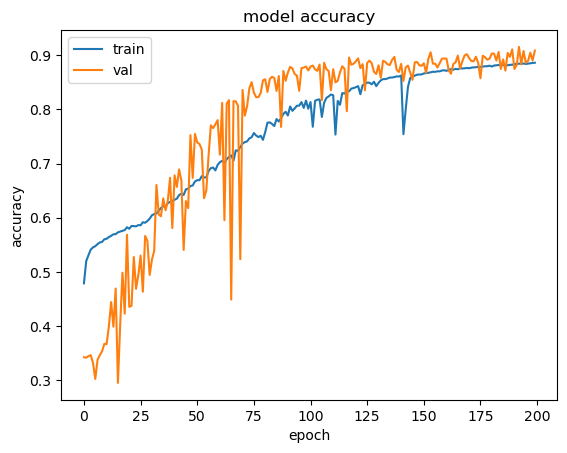

In [7]:
from matplotlib import pyplot as plt 
from sklearn.metrics import classification_report as report

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')


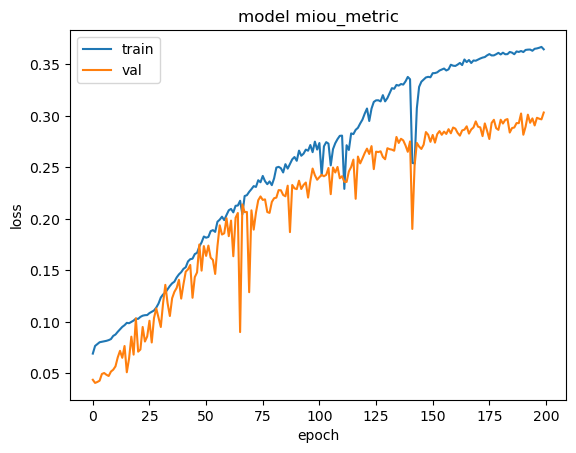

In [9]:

plt.plot(history.history['miou_metric'])
plt.plot(history.history['val_miou_metric'])
plt.title('model miou_metric')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

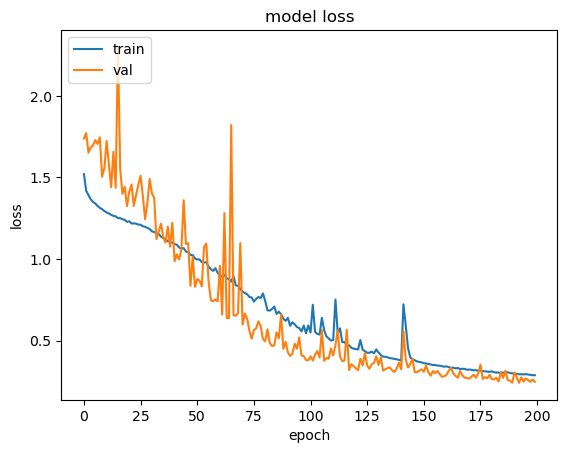

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [14]:
def miou_metric(y_true, y_pred):
    y_true = tf.argmax(y_true, axis=-1)
    y_pred = tf.argmax(y_pred, axis=-1)

    ious = []
    for i in range(8):  # Assuming 8 classes
        temp1 = tf.cast(tf.equal(y_true, i), tf.float32)
        temp2 = tf.cast(tf.equal(y_pred, i), tf.float32)

        union = tf.reduce_sum(temp1 + temp2)
        intersect = tf.reduce_sum(temp1 * temp2)
        iou = tf.math.divide_no_nan(intersect, union)
        ious.append(iou)
    return tf.reduce_mean(ious)
model=keras.models.load_model("unet.h5",custom_objects={'miou_metric': miou_metric})

In [15]:
test_images_path="C:/Amir_Bakhtiary/dl/CA3/B/dataset/TEST/images/"
test_images=os.listdir(test_images_path)
test_mask_path="C:/Amir_Bakhtiary/dl/CA3/B/dataset/TEST/masks/"
test_mask=os.listdir(test_mask_path)

In [16]:
def label_encoder(img):
    print (img.shape)
    label=np.zeros(list(img.shape[:-1])+[1])
    classes=([0,0,0],[0,0,255],
             [0,255,0],
             [0,255,255],
             [255,0,0],
             [255,0,255],
             [255,255,0],
             [255,255,255],
    )
    
    for j in range(8):
        temp=np.zeros(8)
        temp[j]=1
        label[np.all(img == classes[j], axis=-1)]=j
    return label
test=[]
mask=[]
for j in test_images:
    test.append(cv2.resize(cv2.imread(test_images_path+j,cv2.COLOR_BGR2RGB),(160,160)))
for f in test_mask:
    mask.append(label_encoder(cv2.resize(cv2.imread(test_mask_path+f,cv2.COLOR_BGR2RGB),(160,160))))
mask_=keras.utils.to_categorical(np.array(mask))
test=np.array(test)
test_=test.astype("float32")/255


(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 

In [17]:
test_pred=model.predict(test_)

4/4 [==============================] - 1s 158ms/step


**Testing the model**

In [18]:
print (miou_metric(mask_,test_pred))

tf.Tensor(0.2566566, shape=(), dtype=float32)


In [33]:

def create_mask(y_pred):
    classes_colors = np.array([
        [0, 0, 0],
        [0, 0, 255],
        [0, 255, 0],
        [0, 255, 255],
        [255, 0, 0],
        [255, 0, 255],
        [255, 255, 0],
        [255, 255, 255],
    ])

    y_pred = tf.argmax(y_pred, axis=-1)
    
    temp = classes_colors[y_pred].astype(np.uint8)
    temp = np.expand_dims(temp, axis=0)  # Add batch dimension
    
    return temp

In [35]:
test_pred_mask=create_mask(test_pred)

In [42]:
test_pred_mask.shape

(1, 110, 160, 160, 3)

(10, 160, 160, 3)


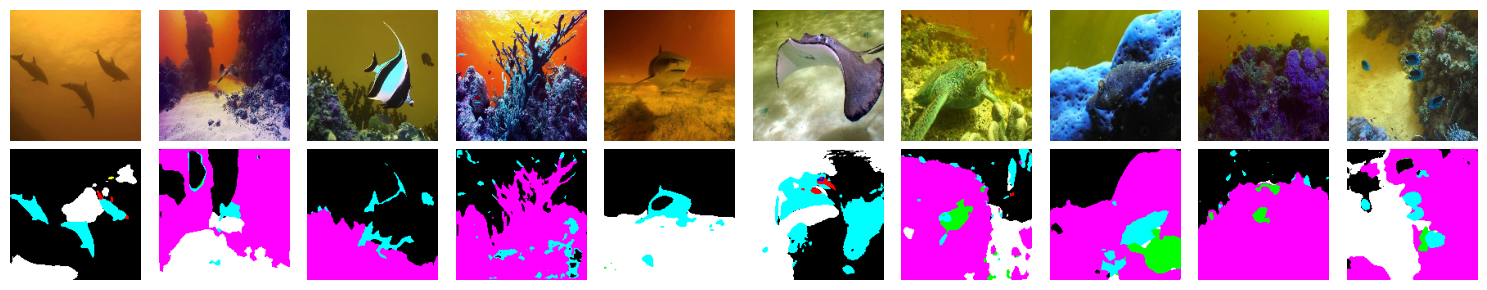

In [45]:

import matplotlib.pyplot as plt
import numpy as np
test_plot=test[30:40]
test_pred_mask_plot=test_pred_mask.reshape(110,160,160,3)[30:40]
print (test_pred_mask_plot.shape)

images=np.concatenate([test_plot,test_pred_mask_plot],axis=0)
# Assuming you have a list of 20 images (replace this with your actual data)
# For simplicity, I'll create a random array of images for demonstration purposes

# Set the number of rows and columns for the subplot grid
num_rows = 2
num_cols = 10

# Create a figure and an array of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3))

# Flatten the 2D array of subplots to simplify indexing
axes = axes.flatten()

# Iterate through the images and plot them on the subplots
for i in range(len(images)):
    axes[i].imshow(images[i], cmap='gray')  # Assuming images are grayscale, adjust cmap as needed
    axes[i].axis('off')  # Turn off axis labels and ticks

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plot
plt.show()